In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_info = pd.read_csv('/home/athel/Downloads/order_info.csv')
df_line = pd.read_csv('/home/athel/Downloads/order_line.csv')

In [4]:
df_info.head()

,Order ID,Customer ID,Warehouse ID,Customer Age,Customer Gender,Date
0,1,CUST966,WH004,65,Female,2023-03-04
1,2,CUST952,WH003,31,Female,2023-04-04
2,3,CUST987,WH001,25,Female,2023-02-07
3,4,CUST524,WH001,56,Male,2023-03-22
4,5,CUST415,WH002,59,Male,2023-11-11


In [5]:
df_line.head()

,Order ID,Product ID,SKU ID,Category,Quantity,Price per Unit
0,2664,Product_099,SKU_053,Beauty & Personal Care,2,75.67
1,2664,Product_138,SKU_087,Toys & Games,4,636.36
2,2664,Product_190,SKU_831,Groceries & Gourmet Food,4,82.44
3,5028,Product_156,SKU_524,Beauty & Personal Care,3,57.16
4,9143,Product_126,SKU_651,Beauty & Personal Care,2,35.05


In [6]:
df_info.isnull().sum()

Order ID           0
Customer ID        0
Warehouse ID       0
Customer Age       0
Customer Gender    0
Date               0
dtype: int64

In [7]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Order ID         10000 non-null  int64 
 1   Customer ID      10000 non-null  object
 2   Warehouse ID     10000 non-null  object
 3   Customer Age     10000 non-null  int64 
 4   Customer Gender  10000 non-null  object
 5   Date             10000 non-null  object
dtypes: int64(2), object(4)
memory usage: 468.9+ KB


In [8]:
df_line.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24885 entries, 0 to 24884
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        24885 non-null  int64  
 1   Product ID      24885 non-null  object 
 2   SKU ID          24885 non-null  object 
 3   Category        24885 non-null  object 
 4   Quantity        24885 non-null  int64  
 5   Price per Unit  24885 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 1.1+ MB


In [9]:
df_line.shape

(24885, 6)

In [10]:
df_final = pd.merge(df_info, df_line, on = 'Order ID', how = 'inner')

df_final.to_csv('MergedData.csv', index = False)


In [11]:
df_final

,Order ID,Customer ID,Warehouse ID,Customer Age,Customer Gender,Date,Product ID,SKU ID,Category,Quantity,Price per Unit
0,1,CUST966,WH004,65,Female,2023-03-04,Product_110,SKU_291,Health & Wellness,4,527.06
1,1,CUST966,WH004,65,Female,2023-03-04,Product_142,SKU_005,Health & Wellness,5,847.13
2,1,CUST966,WH004,65,Female,2023-03-04,Product_197,SKU_151,Electronics,2,214.60
3,1,CUST966,WH004,65,Female,2023-03-04,Product_195,SKU_945,Fashion & Apparel,1,513.50
4,1,CUST966,WH004,65,Female,2023-03-04,Product_110,SKU_333,Health & Wellness,5,436.15
...,...,...,...,...,...,...,...,...,...,...,...
24880,10000,CUST297,WH001,34,Male,2023-03-14,Product_002,SKU_796,Home Appliances,2,394.07
24881,10000,CUST297,WH001,34,Male,2023-03-14,Product_127,SKU_860,Books & Media,3,314.45
24882,10000,CUST297,WH001,34,Male,2023-03-14,Product_034,SKU_723,Automotive,1,831.30
24883,10000,CUST297,WH001,34,Male,2023-03-14,Product_173,SKU_426,Fashion & Apparel,2,154.34


In [12]:
df_final.isnull().sum()

Order ID           0
Customer ID        0
Warehouse ID       0
Customer Age       0
Customer Gender    0
Date               0
Product ID         0
SKU ID             0
Category           0
Quantity           0
Price per Unit     0
dtype: int64

# Correlation Matrix

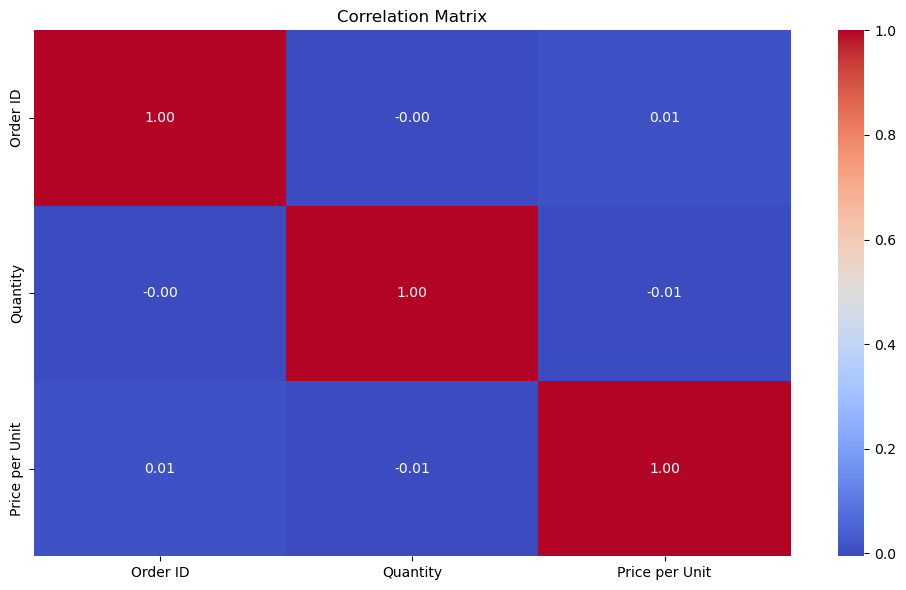

In [13]:
comatrix = df_final[['Order ID','Quantity','Price per Unit']].corr()
plt.figure(figsize = (10,6))
sns.heatmap(comatrix, annot =True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# CATEGORIES

## Graphs


In [14]:
cat = df_final.Category.value_counts().index
cat_vals = df_final.Category.value_counts().values

print(cat_vals)

[3244 3160 3040 2956 2797 2698 2342 1983 1745  920]


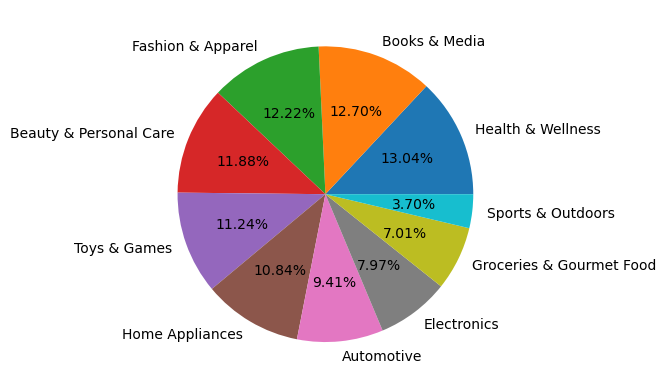

In [15]:
plt.pie(cat_vals, labels = cat, autopct = '%1.2f%%')
plt.show()

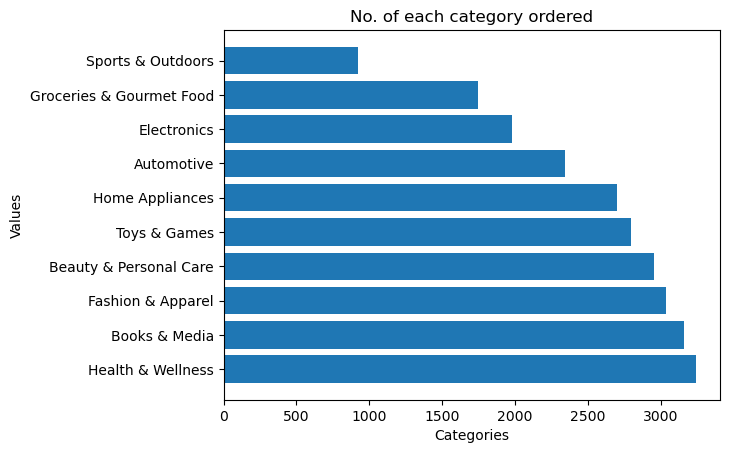

In [16]:
plt.title('No. of each category ordered')
plt.barh(cat, cat_vals)
plt.xlabel('Categories')
plt.ylabel('Values')
plt.show()

In [17]:
df_final['Sales'] = df_final['Quantity'] * df_final['Price per Unit']
df_final.groupby(['Category'])['Sales'].sum()

Category
Automotive                  3672259.29
Beauty & Personal Care       537300.17
Books & Media               5008195.87
Electronics                 3074305.11
Fashion & Apparel           4772189.52
Groceries & Gourmet Food    2767763.46
Health & Wellness           5168598.37
Home Appliances             4272364.68
Sports & Outdoors           1432999.73
Toys & Games                4431315.95
Name: Sales, dtype: float64

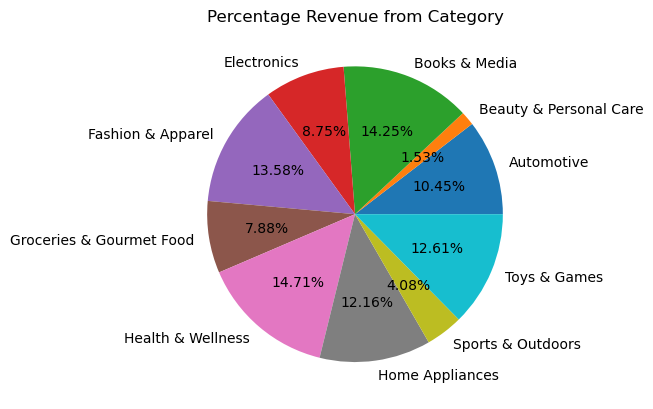

In [18]:
grouped = df_final.groupby(['Category'])['Sales'].sum()
vals = grouped.values
cats = grouped.index
plt.pie(vals, labels = cats, autopct = '%1.2f%%')
plt.title('Percentage Revenue from Category')
plt.show()

## INFERENCES

Most ordered category was 'Health & Wellness' with 13.04% of sales being from that followed by 'Books & Media' and 'Fashion & Apparel' being 12.70% and 12.22% respectively. Most of the revenue came from Health & Wellness while the last revenue came from Beauty & Personal Care

# WAREHOUSE

## Graphs

In [19]:
ware_ids = df_final['Warehouse ID'].value_counts().index
ware_vals = df_final['Warehouse ID'].value_counts().values
print(ware_ids)

Index(['WH002', 'WH005', 'WH003', 'WH001', 'WH004'], dtype='object', name='Warehouse ID')


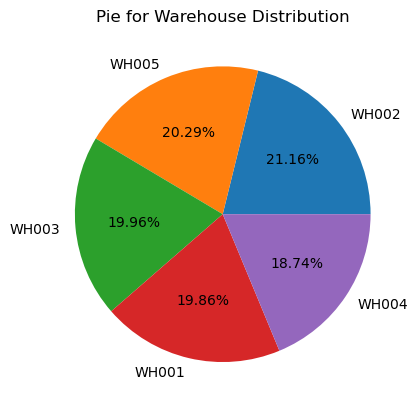

In [20]:
plt.pie(ware_vals, labels = ware_ids, autopct = '%1.2f%%')
plt.title('Pie for Warehouse Distribution')
plt.show()

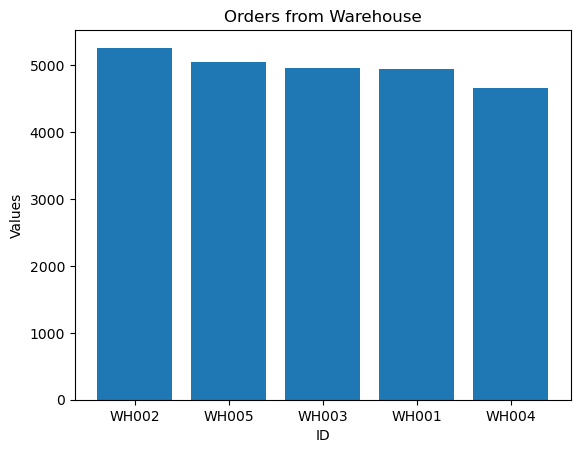

In [21]:
plt.bar(ware_ids, ware_vals)
plt.xlabel('ID')
plt.ylabel('Values')
plt.title('Orders from Warehouse')
plt.show()

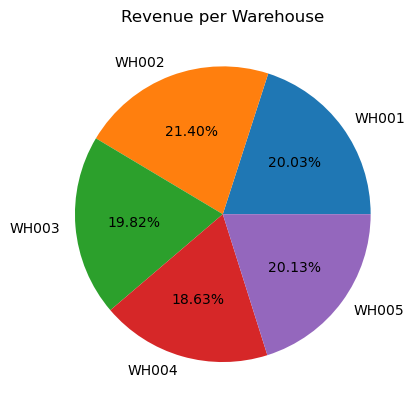

In [22]:
g1 = df_final.groupby(['Warehouse ID'])['Sales'].sum()
wvals = g1.values
wids = g1.index
plt.pie(wvals, labels = wids, autopct = '%1.2f%%')
plt.title('Revenue per Warehouse')
plt.show()

## INFERENCES

Most of the orders were taken from WH002 with 21.16% orders coming from that warehouse

# Age

## GRAPH

In [23]:
age = df_final['Customer Age'].value_counts().index
age_vals = df_final['Customer Age'].value_counts().values
print(age_vals)

[800 762 742 736 704 647 643 627 626 613 576 573 551 548 545 538 537 535
 535 533 527 527 523 516 515 515 512 511 505 501 489 486 478 464 449 440
 439 436 428 418 415 400 378 361 353 334 314 280]


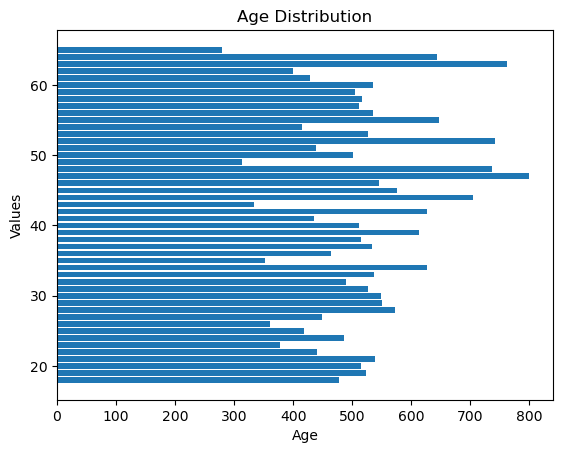

In [24]:
plt.barh(age, age_vals)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Values')
plt.show()

## INFERENCES

Most of the items were ordered by 47 year olds followed by 63 year olds

# GENDER

## Graphs

In [25]:
gender = df_final['Customer Gender'].value_counts().index
gender_vals = df_final['Customer Gender'].value_counts().values

In [26]:
gend = df_info['Customer Gender'].value_counts().index
gend_vals = df_info['Customer Gender'].value_counts().values

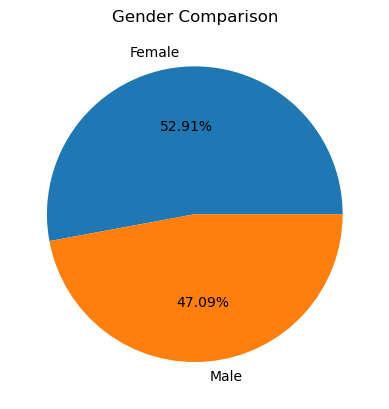

In [27]:
plt.pie(gend_vals, labels = gend, autopct = '%1.2f%%')
plt.title('Gender Comparison')
plt.show()

In [28]:
df_info.groupby(['Customer Gender']).size()

Customer Gender
Female    5291
Male      4709
dtype: int64

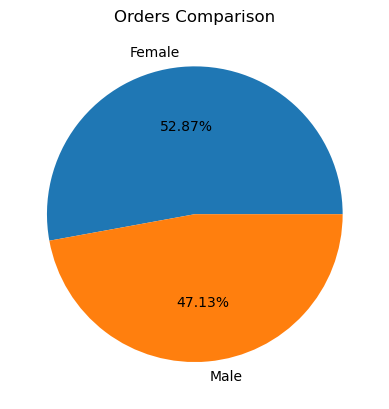

In [29]:
plt.pie(gender_vals, labels = gender, autopct = '%1.2f%%')
plt.title('Orders Comparison')
plt.show()

## INFERENCE

52.87% of the items were ordered by females while 52.91% of their customers are female.

# OTHERS


## Gender v Category

In [30]:
t1 = df_final.groupby(['Customer Gender', 'Category']).size().reset_index().rename(columns = {0 : 'Count'})
print(t1)
male_counts = t1[t1['Customer Gender'] == 'Male']['Count']
female_counts = t1[t1['Customer Gender'] == 'Female']['Count']


   Customer Gender                  Category  Count
0           Female                Automotive   1207
1           Female    Beauty & Personal Care   1608
2           Female             Books & Media   1674
3           Female               Electronics   1053
4           Female         Fashion & Apparel   1640
5           Female  Groceries & Gourmet Food    898
6           Female         Health & Wellness   1714
7           Female           Home Appliances   1365
8           Female         Sports & Outdoors    485
9           Female              Toys & Games   1513
10            Male                Automotive   1135
11            Male    Beauty & Personal Care   1348
12            Male             Books & Media   1486
13            Male               Electronics    930
14            Male         Fashion & Apparel   1400
15            Male  Groceries & Gourmet Food    847
16            Male         Health & Wellness   1530
17            Male           Home Appliances   1333
18          

In [31]:
y = np.arange(len(cat))
width1 = 0.35

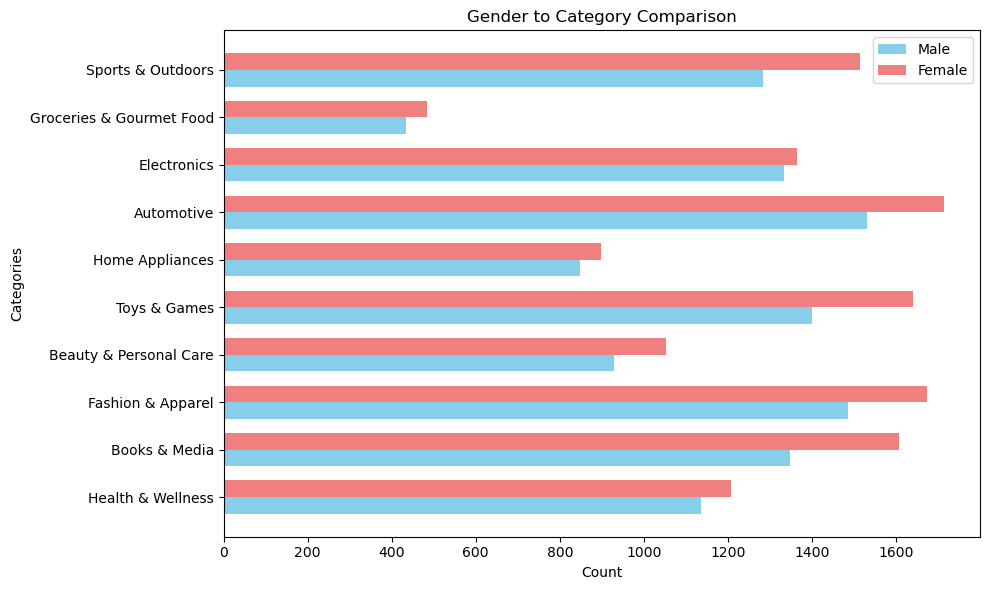

In [32]:
fig, ax = plt.subplots(figsize = (10,6))

ax.barh(y - width1/2, male_counts, width1, label = 'Male', color = 'skyblue')
ax.barh(y + width1/2, female_counts, width1, label = 'Female', color = 'lightcoral')

ax.set_xlabel('Count')
ax.set_ylabel('Categories')
ax.set_title('Gender to Category Comparison')
ax.set_yticks(y)
ax.set_yticklabels(cat)
ax.legend()

plt.tight_layout()
plt.show()

## Warehouse v Category

In [33]:
t2 = df_final.groupby(['Warehouse ID', 'Category']).size().reset_index().rename(columns = {0 : 'Count'})
count1 = t2[t2['Warehouse ID'] == 'WH001']['Count']
count2 = t2[t2['Warehouse ID'] == 'WH002']['Count']
count3 = t2[t2['Warehouse ID'] == 'WH003']['Count']
count4 = t2[t2['Warehouse ID'] == 'WH004']['Count']
count5 = t2[t2['Warehouse ID'] == 'WH005']['Count']

In [34]:
y = np.arange(len(cat))
width2 = 0.15

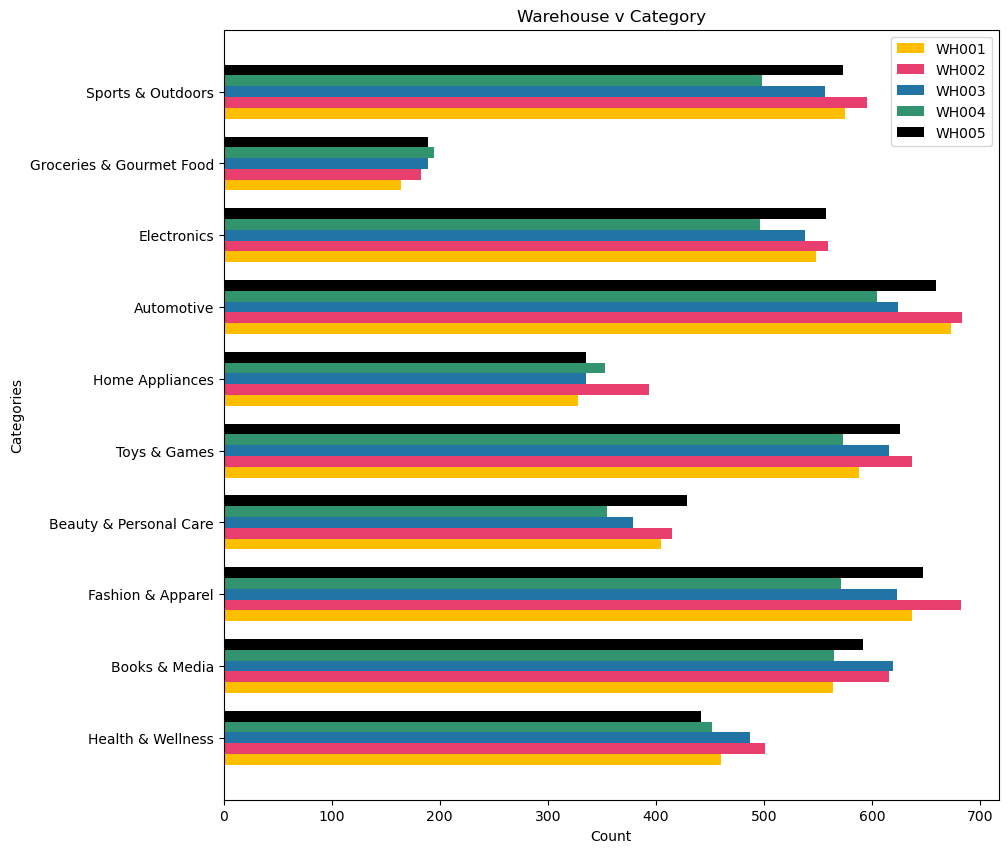

In [35]:
fig, ax = plt.subplots(figsize = (10,10))

ax.barh(y - 2 * width2, count1, width2, label = 'WH001', color = '#FFBF00')
ax.barh(y - width2, count2, width2, label = 'WH002', color = '#E83F6F')
ax.barh(y, count3, width2, label = 'WH003', color = '#2274A5')
ax.barh(y + width2, count4, width2, label = 'WH004', color = '#32936F')
ax.barh(y + 2 * width2, count5, width2, label = 'WH005', color = '#000000')

ax.set_xlabel('Count')
ax.set_ylabel('Categories')
ax.set_title('Warehouse v Category')
ax.set_yticks(y)
ax.set_yticklabels(cat)
ax.legend()

In [36]:
plt.show()

# Others
## PPU v Category

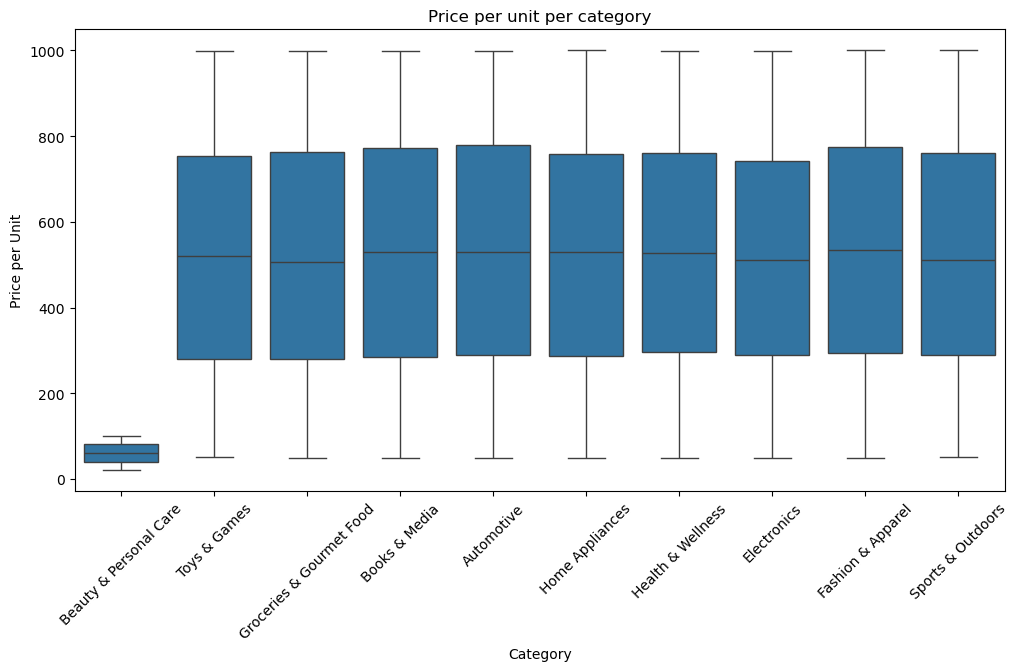

In [37]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'Category', y = 'Price per Unit', data = df_line)
plt.xticks(rotation = 45)
plt.title('Price per unit per category')
plt.show()

## Monthly Orders

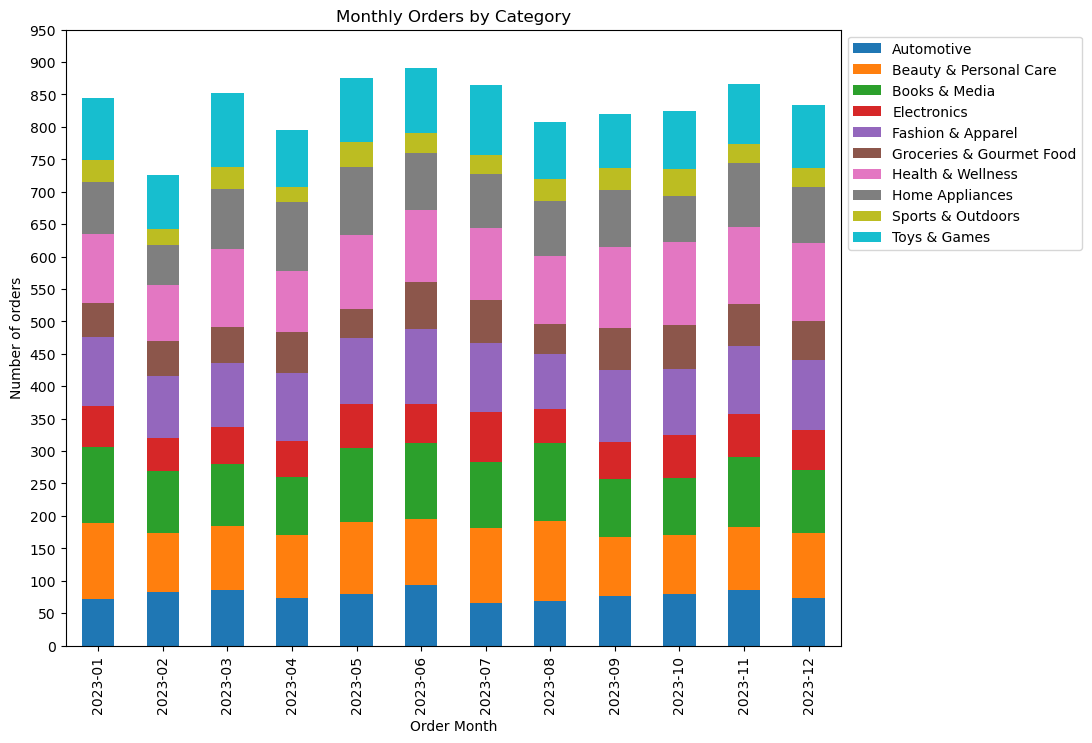

In [38]:
df_line['Order Month'] = pd.to_datetime(df_info['Date']).dt.to_period('M')
monthly_category = df_line.groupby(['Order Month', 'Category']).size().unstack()
monthly_category.plot(kind = 'bar', stacked = True, figsize = (10,8))
plt.title('Monthly Orders by Category')
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.yticks(np.arange(0,1000,50))
plt.ylabel('Number of orders')
plt.show()

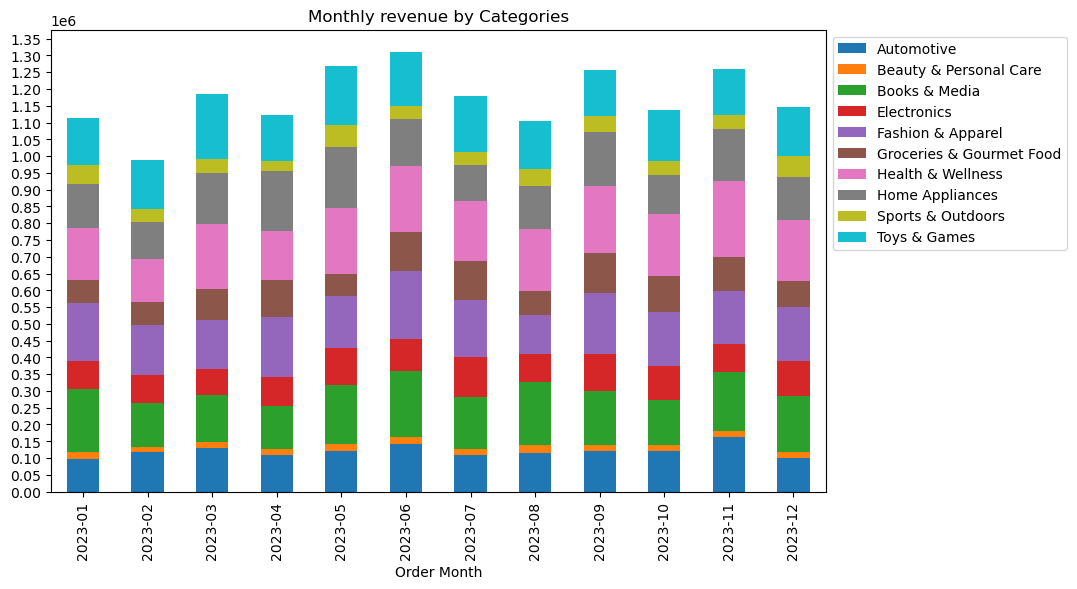

In [39]:
df_line['Sales'] = df_line['Quantity'] * df_line['Price per Unit']
monthly_sales = df_line.groupby(['Order Month','Category'])['Sales'].sum().unstack()
monthly_sales.plot(kind = 'bar', stacked = True, figsize = (10,6))
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.title('Monthly revenue by Categories')
plt.yticks(np.arange(0,1400000, 50000))
plt.show()

In [40]:
df_final.head()

,Order ID,Customer ID,Warehouse ID,Customer Age,Customer Gender,Date,Product ID,SKU ID,Category,Quantity,Price per Unit,Sales
0,1,CUST966,WH004,65,Female,2023-03-04,Product_110,SKU_291,Health & Wellness,4,527.06,2108.24
1,1,CUST966,WH004,65,Female,2023-03-04,Product_142,SKU_005,Health & Wellness,5,847.13,4235.65
2,1,CUST966,WH004,65,Female,2023-03-04,Product_197,SKU_151,Electronics,2,214.60,429.20
3,1,CUST966,WH004,65,Female,2023-03-04,Product_195,SKU_945,Fashion & Apparel,1,513.50,513.50
4,1,CUST966,WH004,65,Female,2023-03-04,Product_110,SKU_333,Health & Wellness,5,436.15,2180.75
